In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv('ML101_train_dataset.csv')

df.drop(['LifeStyle'],axis=1,inplace=True)

numeric_cols = df.select_dtypes(include=['float']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_category = df[col].mode()[0]
    df[col].fillna(mode_category, inplace=True)
df

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Gender,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP
0,15725.000000,6.518042,1714.0,56.000000,Male,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416
1,6733.000000,9.176300,2508.0,69.000000,Female,176.826592,54.635484,191.698148,104.851888,198.729261,-103.634282
2,7424.000000,4.856772,1366.0,46.000000,Male,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911
3,11853.000000,9.727244,2189.0,32.000000,Female,168.520316,59.397202,205.440351,121.982302,204.527361,99.791603
4,7521.000000,6.433183,2342.0,48.526844,Male,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932
...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.005729,2030.0,53.000000,Male,182.202253,65.035350,212.133380,115.360556,348.653753,88.464038
99996,10959.000000,9.661165,2233.0,22.000000,Male,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461
99997,10497.616889,7.378317,2080.0,37.000000,Male,168.520316,41.227254,224.300704,121.369845,195.905161,-107.061245
99998,12110.000000,9.843323,1434.0,72.000000,Female,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967


In [47]:
df.isnull().mean()*100

Average Daily Steps    0.0
Hours of Sleep         0.0
Caloric Intake         0.0
Age                    0.0
Gender                 0.0
Height                 0.0
Weight                 0.0
Cholesterol level      0.0
Blood Sugar level      0.0
Systolic BP            0.0
Diastolic BP           0.0
dtype: float64

In [48]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [49]:
mode_value = df['Gender'].mode()[0]
df['Gender'].fillna(mode_value, inplace=True)

df = pd.get_dummies(df,columns=['Gender'])
df['Gender_Female'] = df['Gender_Female'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [50]:
df

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.000000,6.518042,1714.0,56.000000,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0,1
1,6733.000000,9.176300,2508.0,69.000000,176.826592,54.635484,191.698148,104.851888,198.729261,-103.634282,1,0
2,7424.000000,4.856772,1366.0,46.000000,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0,1
3,11853.000000,9.727244,2189.0,32.000000,168.520316,59.397202,205.440351,121.982302,204.527361,99.791603,1,0
4,7521.000000,6.433183,2342.0,48.526844,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.005729,2030.0,53.000000,182.202253,65.035350,212.133380,115.360556,348.653753,88.464038,0,1
99996,10959.000000,9.661165,2233.0,22.000000,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0,1
99997,10497.616889,7.378317,2080.0,37.000000,168.520316,41.227254,224.300704,121.369845,195.905161,-107.061245,0,1
99998,12110.000000,9.843323,1434.0,72.000000,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967,1,0


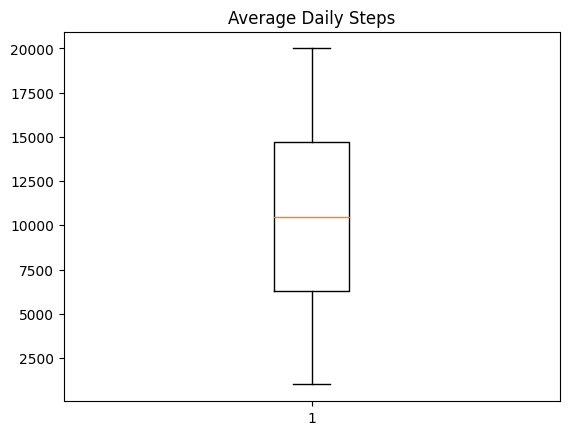

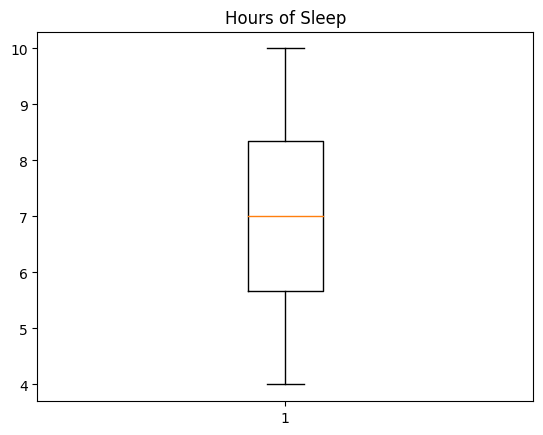

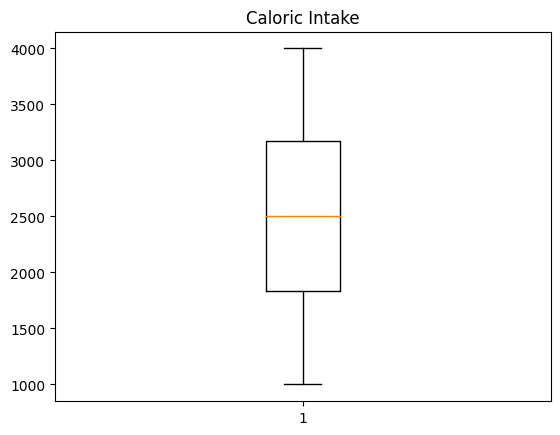

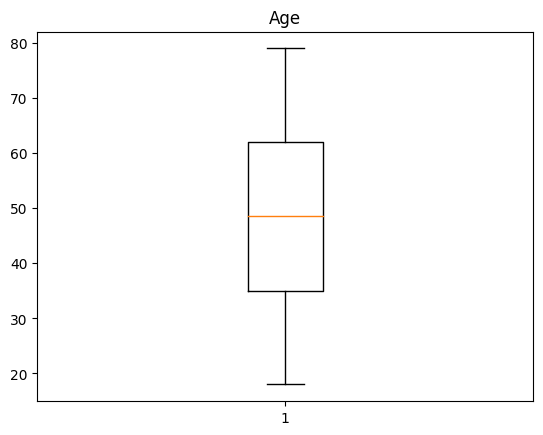

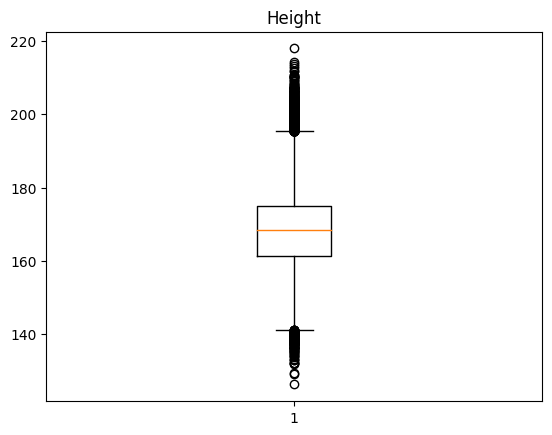

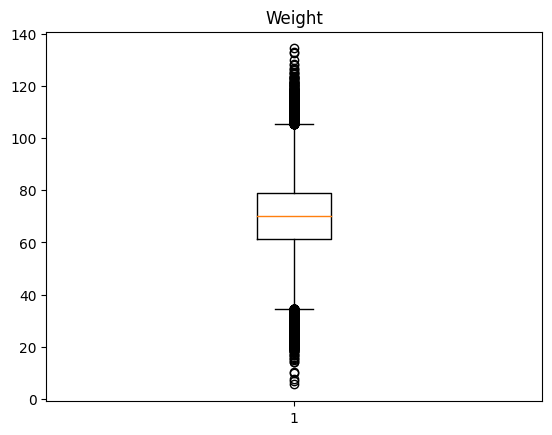

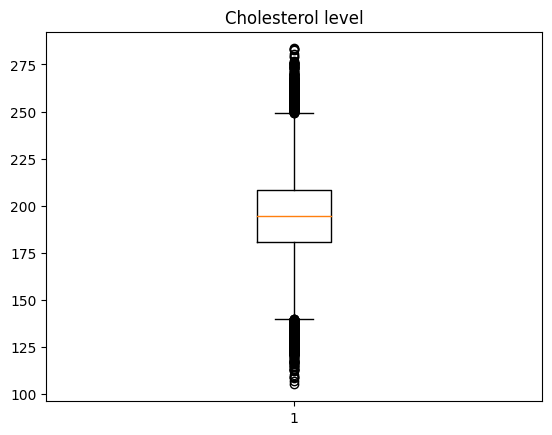

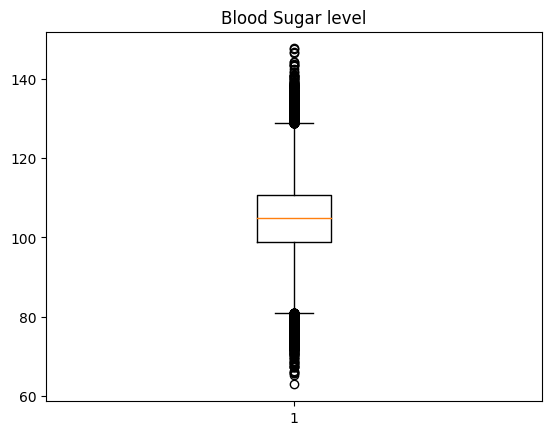

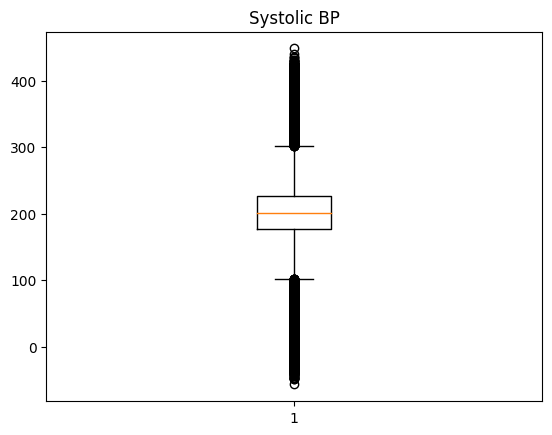

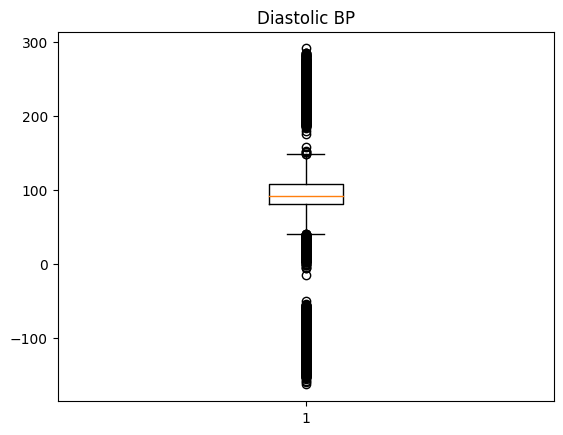

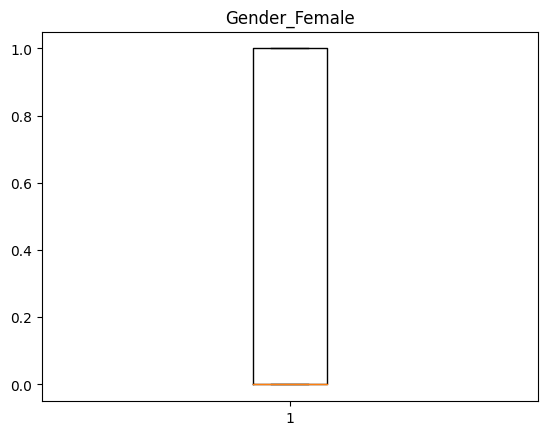

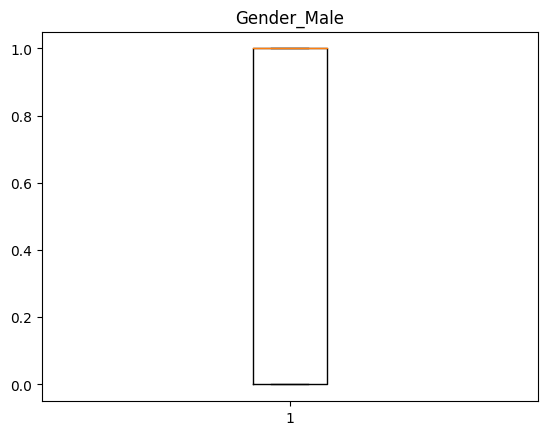

In [51]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [52]:
df.columns

Index(['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [53]:
def fix_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
    
cols_fix = ['Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP']
for column in cols_fix:
    fix_outliers_iqr(df, column)


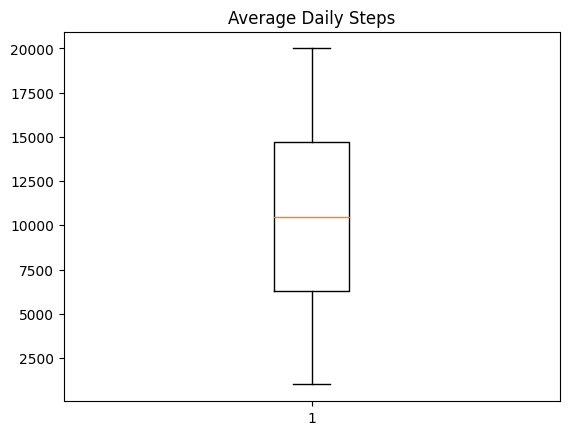

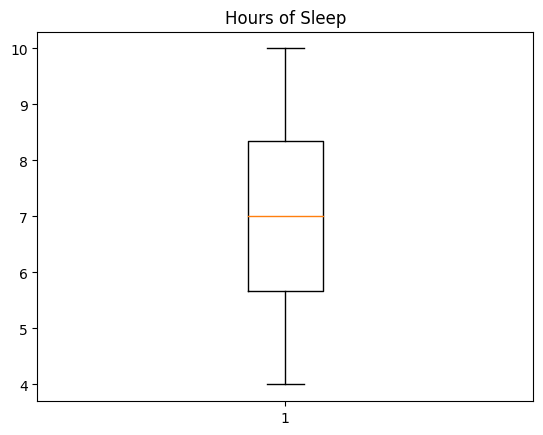

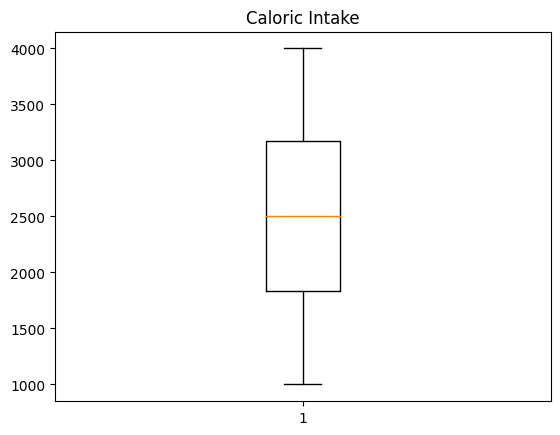

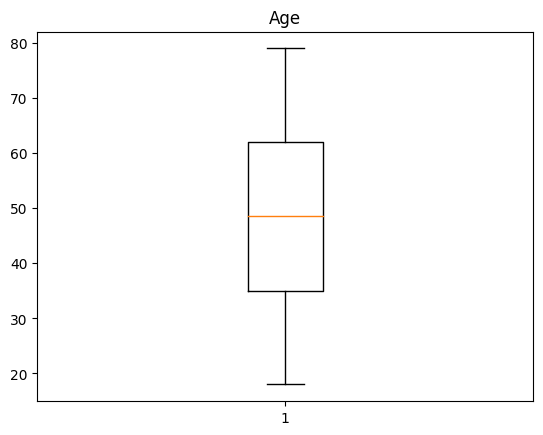

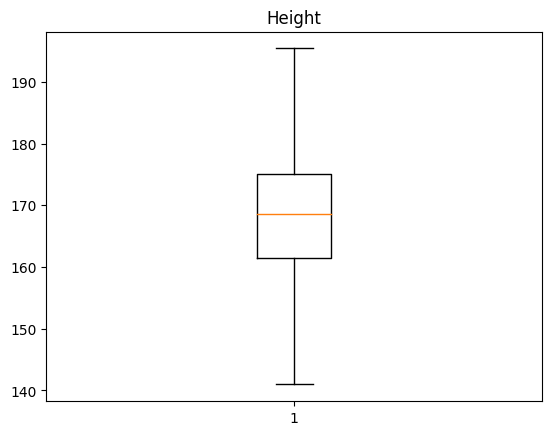

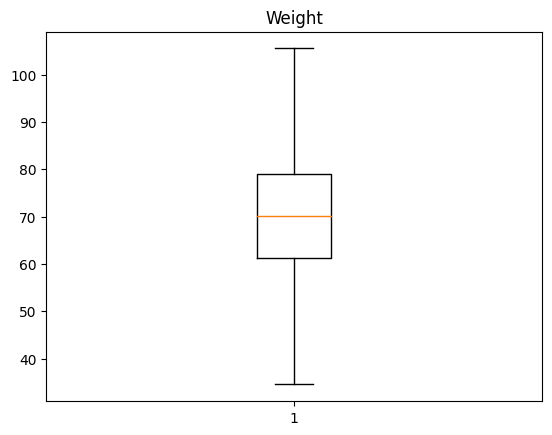

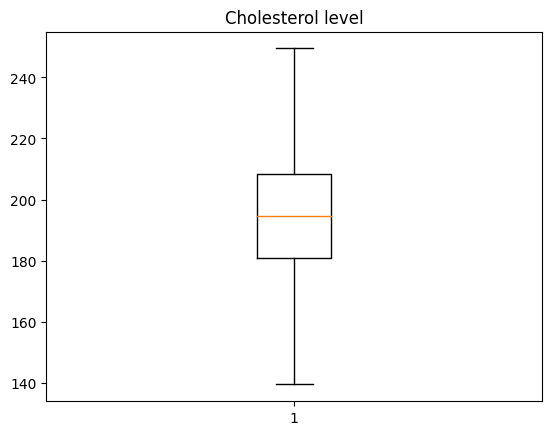

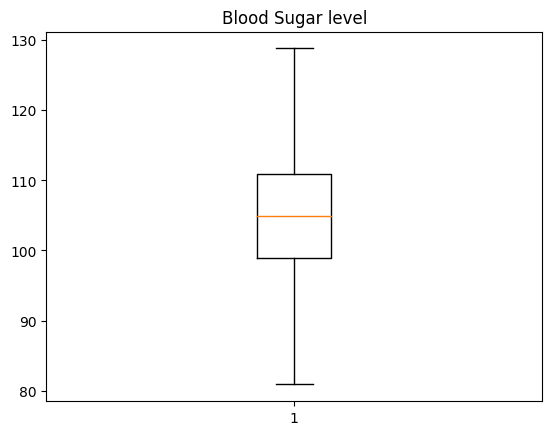

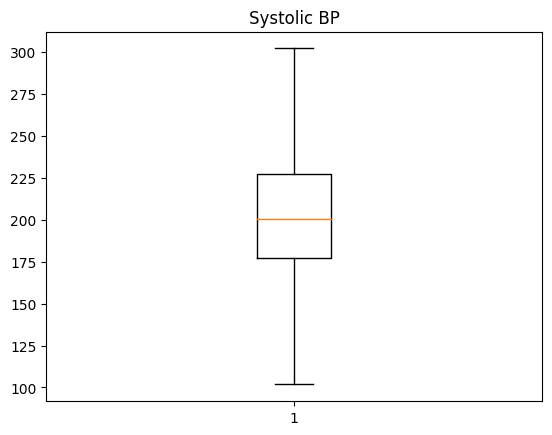

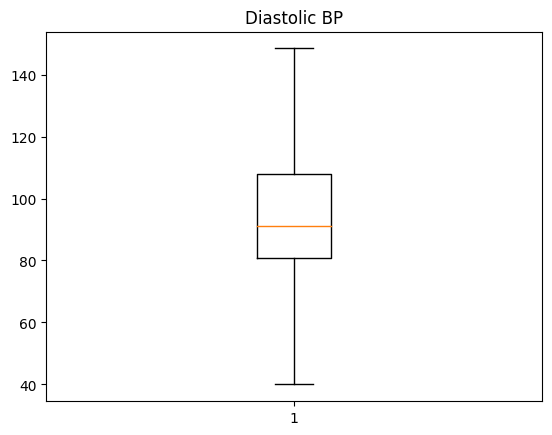

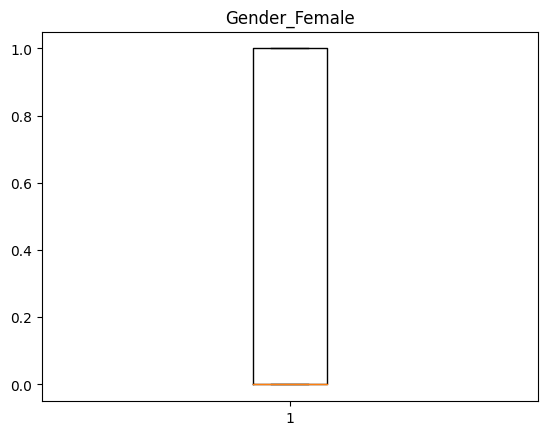

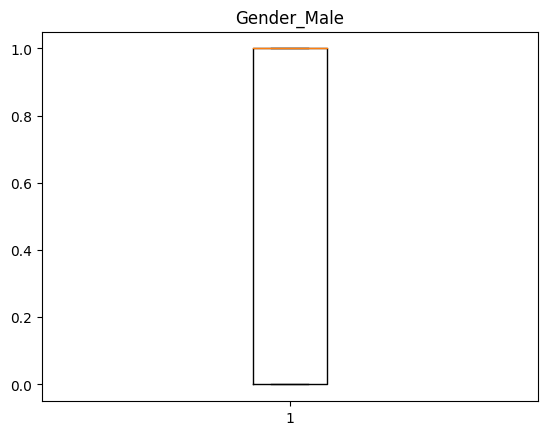

In [54]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [55]:
df

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.000000,6.518042,1714.0,56.000000,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0,1
1,6733.000000,9.176300,2508.0,69.000000,176.826592,54.635484,191.698148,104.851888,198.729261,39.959053,1,0
2,7424.000000,4.856772,1366.0,46.000000,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0,1
3,11853.000000,9.727244,2189.0,32.000000,168.520316,59.397202,205.440351,121.982302,204.527361,99.791603,1,0
4,7521.000000,6.433183,2342.0,48.526844,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.005729,2030.0,53.000000,182.202253,65.035350,212.133380,115.360556,302.149573,88.464038,0,1
99996,10959.000000,9.661165,2233.0,22.000000,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0,1
99997,10497.616889,7.378317,2080.0,37.000000,168.520316,41.227254,224.300704,121.369845,195.905161,39.959053,0,1
99998,12110.000000,9.843323,1434.0,72.000000,155.025779,105.499318,140.865132,94.524506,149.675364,148.446168,1,0


In [56]:
class MY_GD_Regressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [57]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = MY_GD_Regressor(epochs=30,learning_rate=0.001)

In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=['Systolic BP','Diastolic BP']),df['Systolic BP'],test_size=0.4)
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(df.drop(columns=['Systolic BP','Diastolic BP']),df['Diastolic BP'],test_size=0.4)
lr1.fit(xtrain,ytrain)
lr2.fit(xtrain1,ytrain1)

LinearRegression()

In [59]:
lr3.fit(xtrain,ytrain)

3.867026617232318e+159 [5.01188565e+163 2.70898386e+160 9.72480821e+162 1.87599391e+161
 6.51630023e+161 2.70808701e+161 7.52110199e+161 4.05426804e+161
 1.73381580e+159 2.13321081e+159]


In [60]:
from sklearn.metrics import r2_score
r2_score(ytrain,lr3.predict(xtrain))

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


-inf

In [61]:
test = pd.read_csv('ML101_dataset_test_feature.csv')
test = pd.get_dummies(test,columns=['Gender'])
test['Gender_Female'] = test['Gender_Female'].astype(int)
test['Gender_Male'] = test['Gender_Male'].astype(int)

In [62]:
ypred1 = lr1.predict(test)
ypred2 = lr2.predict(test)
id = np.arange(0,test.shape[0])

In [63]:
data = {'ID':id,'Systolic BP': ypred1, 'Diastolic BP': ypred2}
df = pd.DataFrame(data)

csv_file_path = 'BitbyBit.csv'

df.to_csv(csv_file_path, index=False)